# LEADS SCORING CASE STUDY

##### Prasasti Choudhury, Satadhriti Chakrabarty
##### DS C17 Group 2 February 2020

## STEP 1: IMPORTING AND INSPECTING THE DATA

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas,NumPy,Matplotlib,Seaborn
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)

pd.set_option('display.max_rows',200)

In [3]:
# Importing the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Check for duplicate id columns

In [7]:
#Check whether the ID columns have any duplicate values
boolean = leads.duplicated(subset=['Prospect ID','Lead Number']).any()
boolean

False

##### Drop irrelevant columns!

In [8]:
# Drop the id columns
leads.drop(['Prospect ID','Lead Number'], 1, inplace = True)

#### The 'Select' value in some columns does not make any proper sense.So we need to convert all the 'Select' values to relevant columns or NaN values.

### Finding columns with 'Select' values

In [9]:
leads.isin(['Select']).any()

Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

#### 'Specialization', 'How did you hear about X education', 'Lead Profile' and 'City' have 'Select' values. Let's deal with them first!

In [10]:
#Checking the column 'Specialization'
leads['Specialization'].value_counts(dropna = False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### We can replace the 'Select' values in this field with 'No Specialization' as that is the reason the person has kept it blank.

In [11]:
# Replace 'Select' values
leads['Specialization'] = leads['Specialization'].replace('Select', 'No Specialization')

In [12]:
#Checking the column 'Specialization' after changing the 'Select' column
leads['Specialization'].value_counts(dropna = False)

No Specialization                    1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Next up is 'How did you hear about X Education'

In [13]:
#Checking the column 'How did you hear about X Education'
leads['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### The 'Select' here has no meaningful implications. We can replace it with NaN values! 

In [14]:
# Replace 'Select' values
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)

In [15]:
#Checking the column 'How did you hear about X Education' after modifying the 'Select' values
leads['How did you hear about X Education'].value_counts(dropna = False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Next up is 'Lead Profile'

In [16]:
#Checking the column 'Lead Profile'
leads['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### We can append the 'Select' in 'Other Leads'!

In [17]:
# Replace 'Select' values
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', 'Other Leads')

In [18]:
#Checking the column 'Lead Profile' after modifying the 'Select' values
leads['Lead Profile'].value_counts(dropna = False)

Other Leads                    4633
NaN                            2709
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Next column for treatment is 'City'

In [19]:
#Checking the column 'City'
leads['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### 'Select' in the 'City' column doesn't have any meaningful implications. So we can replace it with NaN.

In [20]:
# Replace 'Select' values
leads['City'] = leads['City'].replace('Select',np.nan)

In [21]:
#Checking the column 'Lead Profile' after modifying the 'Select' column
leads['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### We have come to an end to the 'Select' values treatment. We can proceed to null value checks now!

## STEP 2: DATA PREPARATION

### TREATING MISSING VALUES

In [22]:
#Null values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [23]:
# Percentage of null values in each column
null_percent = round((leads.isnull().sum()/len(leads.index))*100,2)
null_percent

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Let's drop all the columns with missing percentage over 40%!

In [24]:
# Drop the columns with null more than 40%
column_with_nan = leads.columns[leads.isnull().any()]
for column in column_with_nan:
    if leads[column].isnull().sum()*100.0/leads.shape[0] > 40:
        leads.drop(column,1, inplace=True)

In [25]:
# Columns retained after dropping the columns with more than 40% missing values
null_percent1 = round((leads.isnull().sum()/len(leads.index))*100,2)
null_percent1

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Now, we will explore the columns with high missing percentages and see how we can treat the missing values.

In [26]:
#Checking the column 'Country'
leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
Philippines                2
Ghana                      2
Uganda                     2
Italy                      2
Bangladesh                 2
Belgium                    2
China                      2
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Tanzania                   1
Vietnam                    1
Russia        

#### We have 2461 missing values for 'Country'. India leads the list with 6492 entries. The next country is United States with only 69 entries.Hence, keeping this column does not really provide an insight. We will go ahead and drop it!

In [27]:
leads.drop(['Country'],axis=1,inplace=True)

#### Let's go and check the next column 'Specialization'

In [28]:
#Checking the column 'Specialization'
leads['Specialization'].value_counts(dropna = False)

No Specialization                    1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Since the number of missing values in this column is pretty high, we need to replace the missing values here with a new field - 'Not Mentioned'

In [29]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Mentioned')

#### There are a lot of categories and a chunk of them is related to 'Management'. We can club all of them into one category 'Management Specializations'.

In [30]:
# Replace 'Management' related fields
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Management Specializations')

In [31]:
#Checking the column 'Specialization' after removing the missing values and clubbing the categories
leads['Specialization'].value_counts(dropna = False)

Management Specializations           4253
No Specialization                    1942
Not Mentioned                        1438
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Next, we will check the column 'What is your current occupation'!

In [32]:
#Checking the column 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Seems like most of the missing values are due to people being unemployed. So let's append the missing values in the 'Unemployed' field!

In [33]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
#Checking the column 'What is your current occupation' after removing the missing values
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Now, we will deal with the missing values in the column 'What matters most to you in choosing this course'.

In [35]:
#Checking the column 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### This is a highly skewed column with most of the values in a particular category. So instead of replacing the missing values, we can drop this column altogether!

In [36]:
#Dropping the column 'What matters most to you in choosing a course'
leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

#### Next, we will deal with the 'Tags' column!

In [37]:
#Checking the column 'Tags'
leads['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### It will be logical to replace the missing values with something like "Not Mentioned"

In [38]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Mentioned')

#### There are a whole lot of categories in this column. We can club some of those with lower values into a single 'Others' category for better understanding!

In [39]:
#Clubbing values less than 200 into a single category 'Others'
leads['Tags'] = leads['Tags'].replace(['Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Others')

In [40]:
#Checking the column 'Tags' after modification of the categroes
leads['Tags'].value_counts(dropna = False)

Not Mentioned                          3353
Will revert after reading the email    2072
Ringing                                1203
Others                                 1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

#### Next we will check 'Lead Profile' columns!

In [41]:
#Checking the column 'Leads Profile'
leads['Lead Profile'].value_counts(dropna = False)

Other Leads                    4633
NaN                            2709
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### We can easily append the missing values to the 'Other Leads' category.

In [42]:
leads['Lead Profile'] = leads['Lead Profile'].replace(np.nan, 'Other Leads')

In [43]:
#Checking the column 'Leads Profile' after removing the missing values
leads['Lead Profile'].value_counts(dropna = False)

Other Leads                    7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Next, we deal with the 'City' column.

In [44]:
#Checking the column 'City'
leads['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Logically, we should convert the missing values to a new category 'Not Mentioned'

In [45]:
leads['City'] = leads['City'].replace(np.nan, 'Not Mentioned')

In [46]:
#Checking the column 'City' after removing the missing values
leads['City'].value_counts(dropna = False)

Not Mentioned                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Let's check the null percentage now!

In [47]:
# Columns retained after treating the columns with high percentage of missing values
null_percent2 = round((leads.isnull().sum()/len(leads.index))*100,2)
null_percent2

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### Columns with High missing values have been removed. We have to deal with the other columns which still have some missing values!

#### Dealing with 'Lead Source' column

In [48]:
#Checking the column 'Lead Source'
leads['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

#### There are lots of discrepancies in this particular column.
1) 'Google' and 'google' are two separate entries. They should be brought under one umbrella.
2) 'Facebook' and 'Social Media' are two different entries when 'Facebook' is also a type of social media.
3) There are lots of categories which have low counts and should be brought under one commmon category like 'Others'

In [49]:
# Converting the missing values to 'Others' category
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Others')

In [50]:
# Replacing 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [51]:
# Replacing 'Facebook' with 'Social Media'
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')

In [52]:
# Clubbing several categories with the 'Others' category
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','youtubechannel','WeLearn','Pay per Click Ads','welearnblog_Home','NC_EDM','testone','blog'], 'Others')

In [53]:
#Checking the column 'Lead Source' after removing the missing values
leads['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                57
Social Media          57
Name: Lead Source, dtype: int64

#### Dealing with 'TotalVisits' column

In [54]:
#Checking the column 'TotalVisits'
leads['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

#### This is a continuous variable and it is difficult to treat the missing values. We can simply drop the rows with missing values in this case. But before that, let's find out whether there is any other column like this!

#### Dealing with the column 'Page Views Per Visit'

In [55]:
#Checking the column 'Page Views Per Visit'
leads['Page Views Per Visit'].value_counts(dropna = False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
2.20        9
4.33        9
14.00       9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
15.00       4
1.83        4
2.60        4
1.43        4
1.71        4
3.40        4
1.38        3
5.67        3
16.00       3
1.57        3
4.75        3
4.25        3
1.78        3
1.23        2
3.75        2
1.56        2
2.22        2
1.14        2
2.71        2
5.40        2
2.09        2
5.25        2
3.20        2
2.83        2
5.33        2
1.22        2
3.60        2
7.50        2
2.63        1
8.21  

#### Again, this needs same treatment like the 'TotalVisits' column.

#### Dealing with the column 'Last Activity'

In [56]:
#Checking the column 'Last Activity'
leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### The missing values and the other categories with low counts can be converted to a common catgeory 'Others'

In [57]:
# Converting the missing values to 'Others' category
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

In [58]:
# Clubbing several categories with low counts(less than 100) to the category 'Others'
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

In [59]:
#Checking the column 'Last Activity' after dropping the missing values and bringing some categories under one umbrella
leads['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### The missing values should have been replaced with the modal category but since we have to create a category 'others', it would be more accurate to put the missing values in that group.

#### Next we drop the rows with missing values where we could not perform any treatment!

In [60]:
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]

In [61]:
# Final Check for the missing percentages
null_percent3 = round((leads.isnull().sum()/len(leads.index))*100,2)
null_percent3

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

### We are done with missing value treatment. Now let's see whether we can drop any more columns based on their distribution. We take only those columns for whom we haven't treated the missing values earlier because for the columns with missing values, we have already done the class imbalance treatment and clubbed several categories into one meaningful category.

In [62]:
#Checking the column 'Lead Origin'
leads['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [63]:
#Checking the column 'Lead Source'
leads['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                50
Social Media          33
Name: Lead Source, dtype: int64

In [64]:
#Checking the column 'Do Not Email'
leads['Do Not Email'].value_counts(dropna = False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [65]:
#Checking the column 'Do Not Call'
leads['Do Not Call'].value_counts(dropna = False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

##### We can drop this column 'Do Not Call' as more than 99% value is in one category

In [66]:
leads.drop(['Do Not Call'],axis=1,inplace=True)

In [67]:
#Checking the column 'Total Time Spent on Website'
leads['Total Time Spent on Website'].value_counts(dropna = False)

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

In [68]:
#Checking the column 'Search'
leads['Search'].value_counts(dropna = False)

No     9089
Yes      14
Name: Search, dtype: int64

##### We can remove this column 'Search' as well due to the same reasons stated just above.

In [69]:
leads.drop(['Search'],axis=1,inplace=True)

In [70]:
#Checking the column 'Magazine'
leads['Magazine'].value_counts(dropna = False)

No    9103
Name: Magazine, dtype: int64

##### Definitely, we should remove this column as all values are in one category.

In [71]:
leads.drop(['Magazine'],axis=1,inplace=True)

In [72]:
#Checking the column 'Newspaper Article'
leads['Newspaper Article'].value_counts(dropna = False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

##### Again,we drop this column.

In [73]:
leads.drop(['Newspaper Article'],axis=1,inplace=True)

In [74]:
#Checking the column 'X Education Forums'
leads['X Education Forums'].value_counts(dropna = False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

##### Drop this column as well.

In [75]:
leads.drop(['X Education Forums'],axis=1,inplace=True)

In [76]:
#Checking the column 'Newspaper'
leads['Newspaper'].value_counts(dropna = False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

##### Drop the column 'Newspaper'!

In [77]:
leads.drop(['Newspaper'],axis=1,inplace=True)

In [78]:
#Checking the column 'Digital Advertisement'
leads['Digital Advertisement'].value_counts(dropna = False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

##### Drop the column 'Digital Advertisement'!

In [79]:
leads.drop(['Digital Advertisement'],axis=1,inplace=True)

In [80]:
#Checking the column 'Through Recommendations'
leads['Through Recommendations'].value_counts(dropna = False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

##### Drop this column as well.

In [81]:
leads.drop(['Through Recommendations'],axis=1,inplace=True)

In [82]:
#Checking the column 'Receive More Updates About Our Courses'
leads['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

##### Definitely drop this column! 

In [83]:
leads.drop(['Receive More Updates About Our Courses'],axis=1,inplace=True)

In [84]:
#Checking the column 'Update me on Supply Chain Content'
leads['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

##### Definitely drop this column.

In [85]:
leads.drop(['Update me on Supply Chain Content'],axis=1,inplace=True)

In [86]:
#Checking the column 'Get updates on DM Content'
leads['Get updates on DM Content'].value_counts(dropna = False)

No    9103
Name: Get updates on DM Content, dtype: int64

##### Drop this as well!

In [87]:
leads.drop(['Get updates on DM Content'],axis=1,inplace=True)

In [88]:
#Checking the column 'I agree to pay the amount through cheque'
leads['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

##### Drop this column as well!

In [89]:
leads.drop(['I agree to pay the amount through cheque'],axis=1,inplace=True)

In [90]:
#Checking the column 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

##### We can definitely keep the column 'A free copy of Mastering The Interview'

In [91]:
#Checking the column 'Last Notable Activity'
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

##### We can convert some of the above categories into one common category 'Others'

In [92]:
# Clubbing some categories(count less than 100) into one category 'Others'
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','View in browser link Clicked','Approached upfront','Email Received','Form Submitted on Website'], 'Others')

In [93]:
#Checking the column 'Last Notable Activity' after clubbing some of the categories into 'Others'
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

### We are done with removing the irrelevant columns as well. Let's check the columns retained!

In [94]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Most of the variables are categorical. We need to do some outlier treatment for the continuous variable now!

### OUTLIER TREATMENT

#### There are only 3 continuous variables left in the model now. Let's do the outlier treatment for them.

##### Variable 'TotalVisits'

In [96]:
# Variable 'TotalVisits'
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

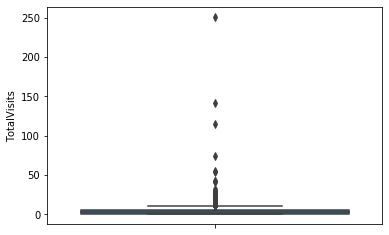

In [97]:
sns.boxplot(y = leads['TotalVisits'])

In [98]:
##Checking the value at 99 %ile
leads['TotalVisits'].quantile(0.99)

17.0

In [99]:
# Capping the values of 'TotalVisits' column at 99 percentile
q = leads['TotalVisits'].quantile(0.99)

leads['TotalVisits'][leads['TotalVisits']>=q]=q

In [100]:
# Variable 'TotalVisits' after capping the outliers
leads['TotalVisits'].describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

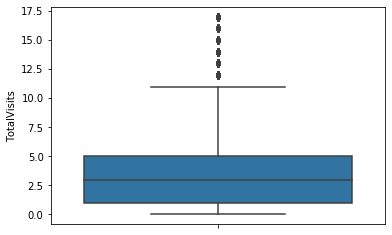

In [101]:
#Check boxplot after capping the outliers
sns.boxplot(y = leads['TotalVisits'])

##### Variable 'Total Time Spent on Website'

In [102]:
# Variable 'Total Time Spent on Website'
leads['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

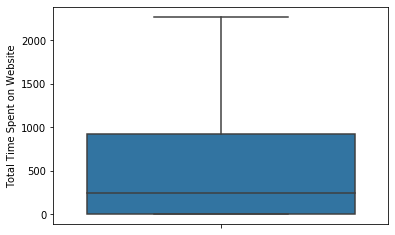

In [103]:
sns.boxplot(y = leads['Total Time Spent on Website'])

In [104]:
##Checking the value at 99 %ile
leads['Total Time Spent on Website'].quantile(0.99)

1838.9599999999991

In [105]:
#Using the traditional method to check outliers(1.5*IQR + 75 %ile)
(1.5*(leads['Total Time Spent on Website'].quantile(0.75)-leads['Total Time Spent on Website'].quantile(0.25)))+leads['Total Time Spent on Website'].quantile(0.75)

2285.25

#### Since the max value falls with the above value beyond which it can be considered as an outlier, so we are keeping that value and not treating it as an outlier

##### Variable 'Page Views Per Visit'

In [106]:
# Variable 'Page Views Per Visit'
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

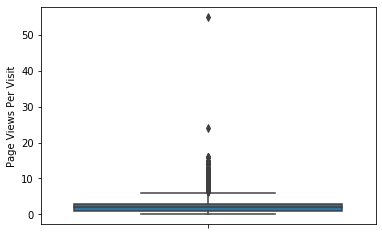

In [107]:
sns.boxplot(y = leads['Page Views Per Visit'])

In [108]:
##Checking the value at 99 %ile
leads['Page Views Per Visit'].quantile(0.99)

9.0

In [109]:
# Capping the values of 'Page Views Per Visit' column at 99 percentile
q = leads['Page Views Per Visit'].quantile(0.99)

leads['Page Views Per Visit'][leads['Page Views Per Visit']>=q]=q

In [110]:
# Variable 'Page Views Per Visit' after capping the outliers
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.334002
std         1.985712
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

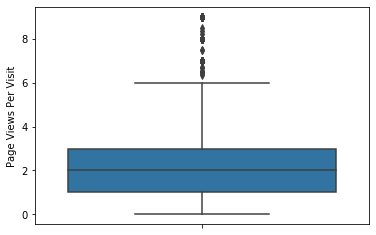

In [111]:
#Check boxplot after capping the outliers
sns.boxplot(y = leads['Page Views Per Visit'])

#### We are done with the outlier treatment for the continuous variables. Now let's do the dummy encoding for the categorical variables.

#### Before the dummy encoding, let's do some EDA first!

##### The data is clean now. We can visualize some plots to get a good understanding of the target variable 'Converted' and its relation with the independent variables. 

In [112]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##  STEP 3: EXPLORATORY DATA ANALYSIS

##### Barplot for the categorical variables

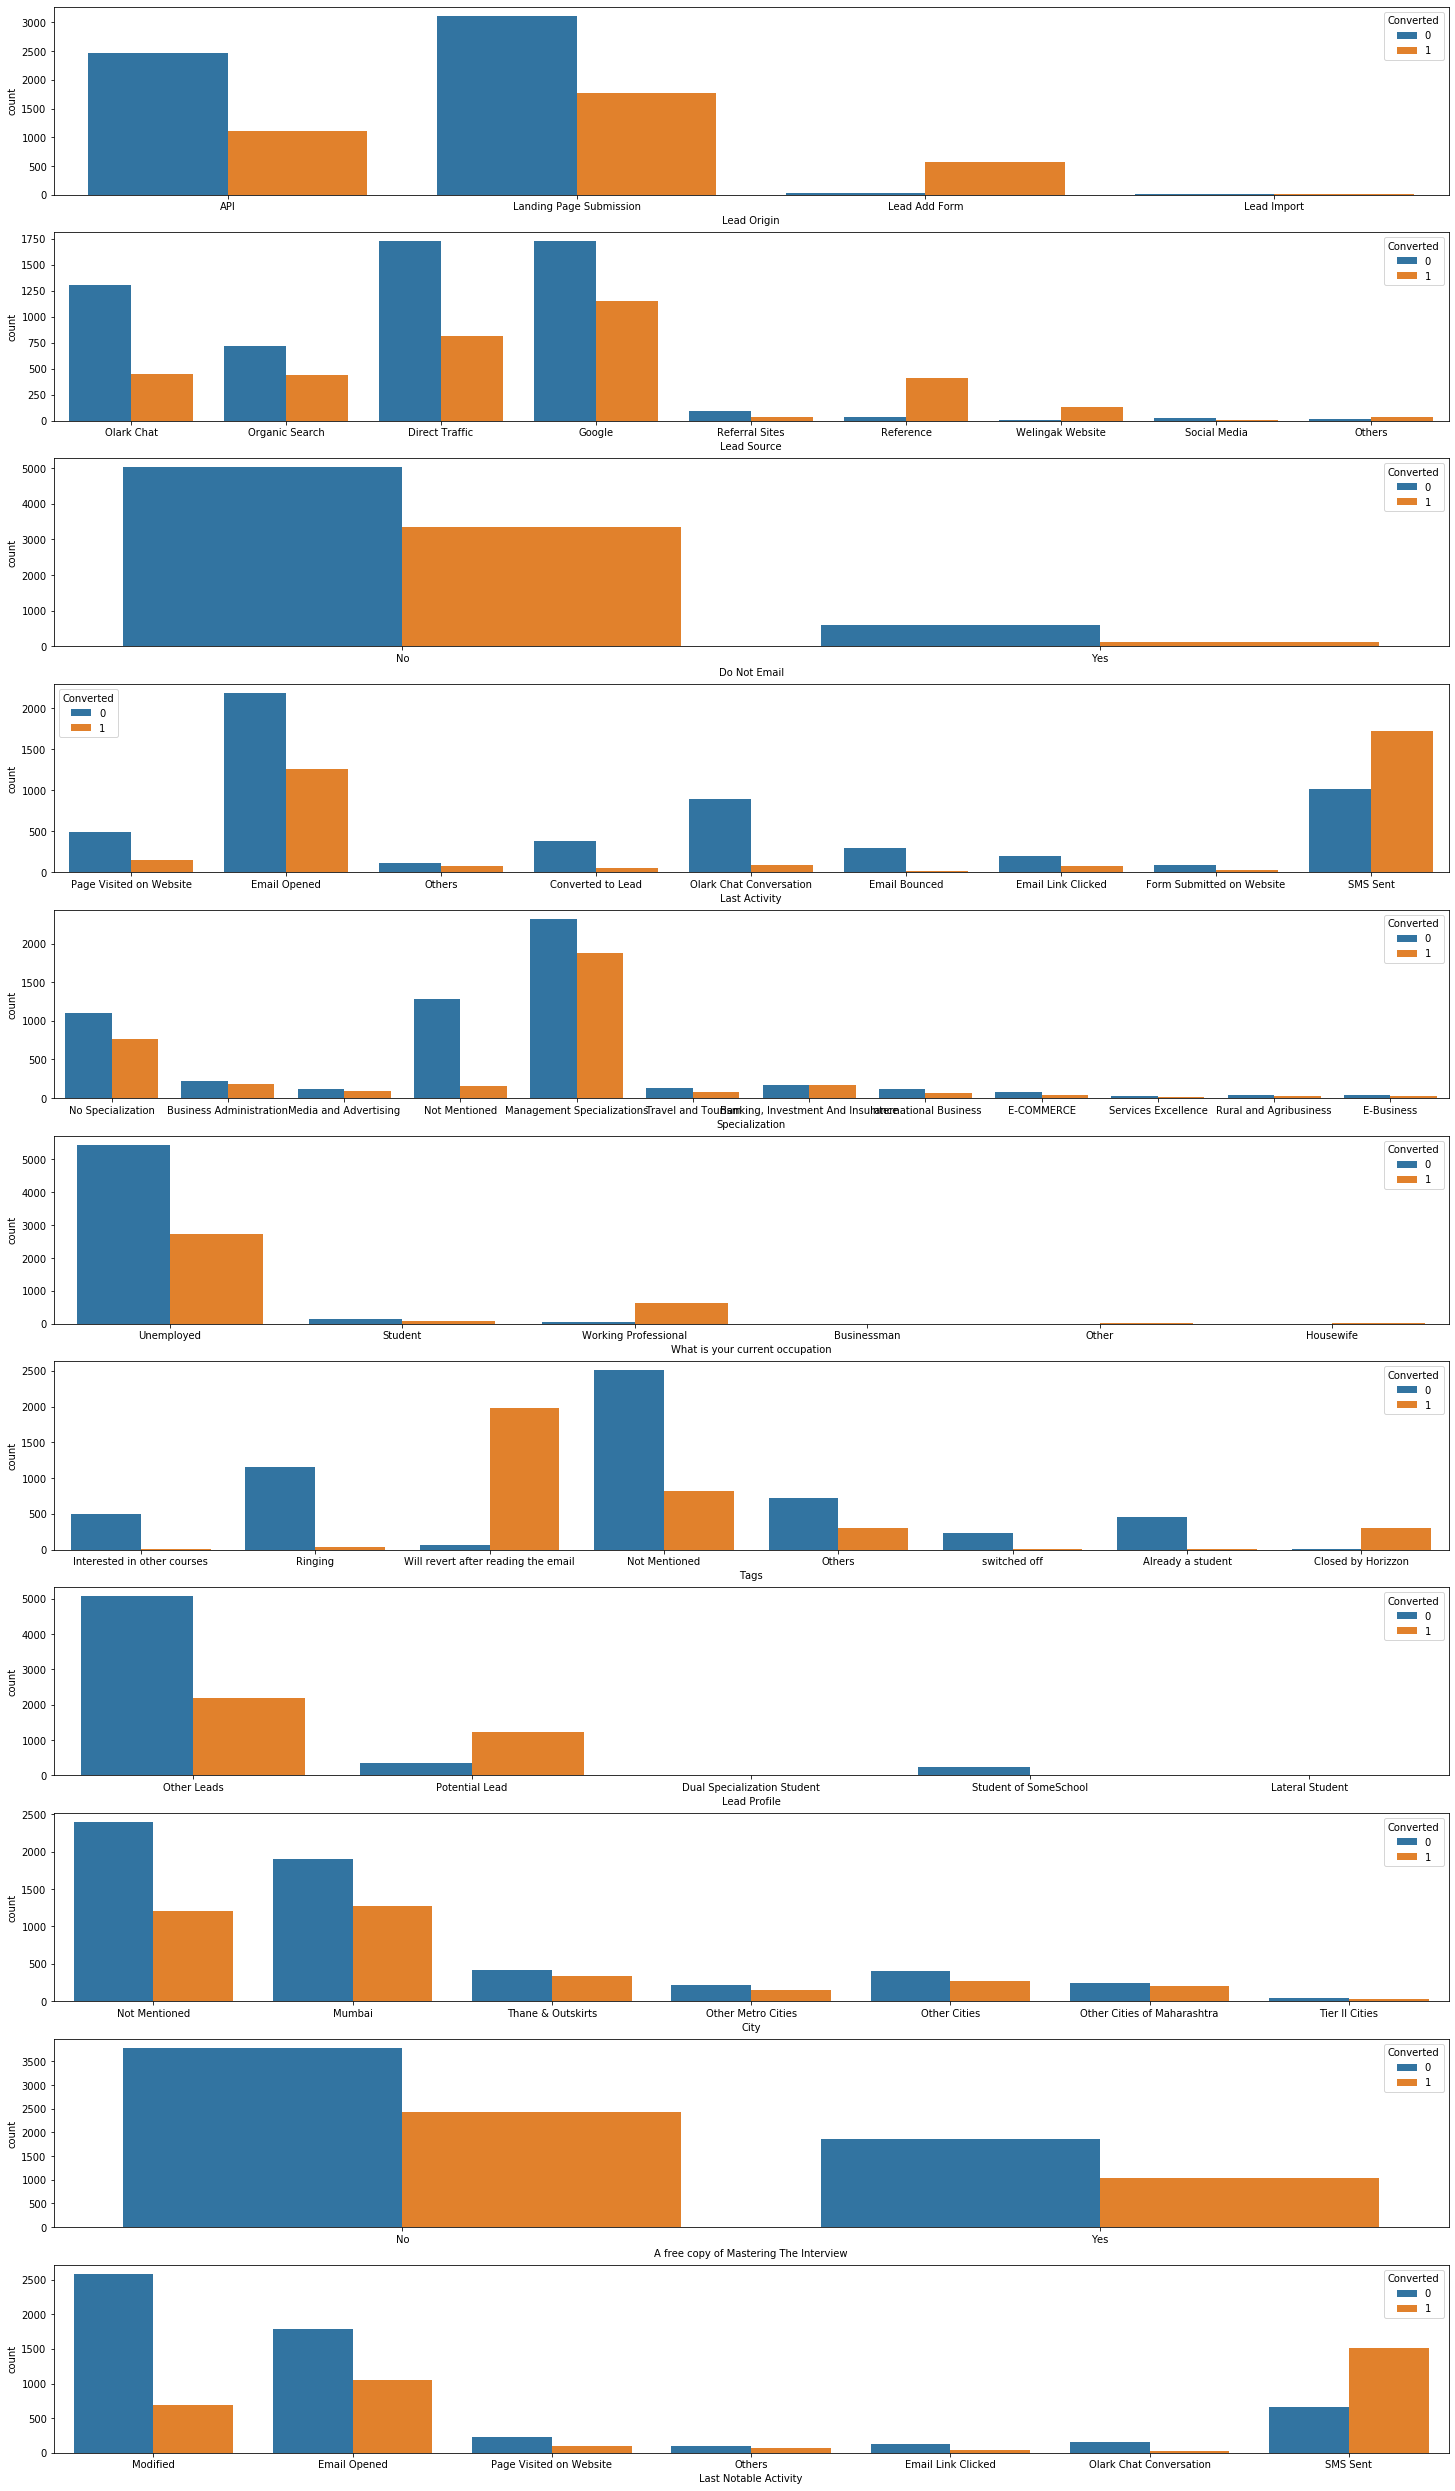

In [113]:
plt.figure(figsize=(25, 45))

plt.subplot(11,1,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
plt.subplot(11,1,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
plt.subplot(11,1,3)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
plt.subplot(11,1,4)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.subplot(11,1,5)
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
plt.subplot(11,1,6)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
plt.subplot(11,1,7)
sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
plt.subplot(11,1,8)
sns.countplot(x = 'Lead Profile', hue = 'Converted', data = leads)
plt.subplot(11,1,9)
sns.countplot(x = 'City', hue = 'Converted', data = leads)
plt.subplot(11,1,10)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = leads)
plt.subplot(11,1,11)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)

### From the analysis of the categorical variables and its relation with the target variable, we can say:
#### i) Lead Origin: 'API' and 'Landing Page Submission' have higher number of leads but the conversion rate is not good. In order to increase the conversion rate, we need to do something to increase conversion on these lines.'Lead Add Form' has a very good conversion rate despite bringing in fewer leads. We must try to increase leads for this.
#### ii) Lead Source: Performance wise, 'Google' does the best though the conversion rate is not satisfactory followed by 'Direct Traffic','Olark Chat' and 'Organic Search'. 'Reference' has a very high conversion rate though the number of leads generated through it is pretty low. 
#### iii) Do Not Email: Most customers want to be notified through mails though the conversion is still not high.
#### iv) Last Activity:'Email Opened' has the highest number of leads while 'SMS Sent' has the highest conversion as well as a good number of leads. We must definitely maintain this and engage more in text messages.
#### v) Specialization: There is a high demand from students with Management Specializations and we must take some measures so that we can increase the conversion in this particular field.
#### vi) What is you current occupation: Most of the leads get generated through unemployed people with a lower conversion and 'Working Professionals' with a low count and a good conversion rate. We must target the 'Working Professionals' group more tactfully.
#### vii) Tags: When people say that they 'Will revert after reading the email', the conversion chance is generally higher.
#### viii) Lead Profile: 'Potential Lead' have the highest conversion as expected and we are somewhat correct in identifying the potential lead. However, we can do even better.
#### ix) City: Most of the leads are from Mumbai though the conversion rate is pretty poor across all the categories.
#### x) A free copy of mastering the interview: Most people do not want a free copy and have almost similar conversion rates to those who do want a free copy.
#### xi) Last Notable Activity: As was in the prebious instance, 'SMS sent' has the highest conversion though people with 'Modified' and 'Email opened' tags generate more leads.

##### Boxplot for the continuous variables

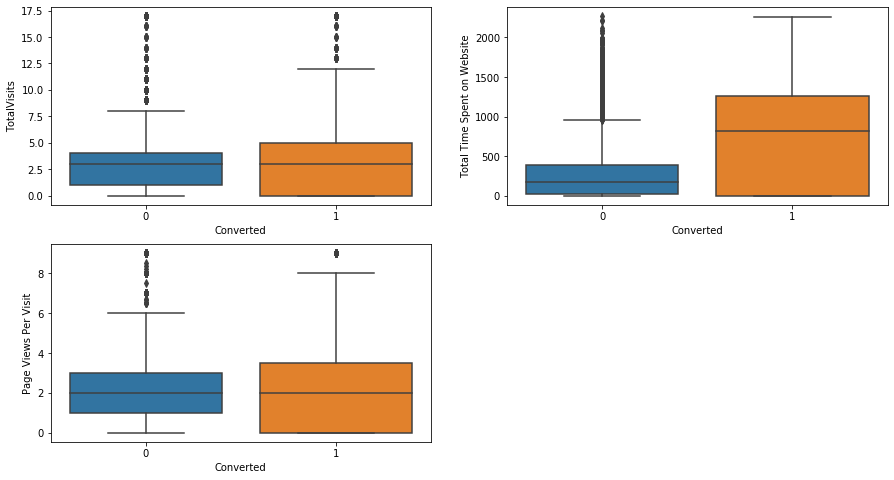

In [114]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(2,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.subplot(2,2,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

### From the analysis of the continuous variables, we can say:
#### i) TotalVisits: The spread when the lead is getting converted is more, but the median values for both conversion and non-conversion are pretty much the same. It's difficult to conclude anything from this.
#### ii) Total Time Spent on Website: Clearly, people spending more time on Website have a higher tendency to get converted.
#### iii) Page Views Per Visit: Again, since the median values are almost similar, it's hard to derive any pattern.

##### Let's check the pairwise correlation of the continuous variables and the target variable as well!

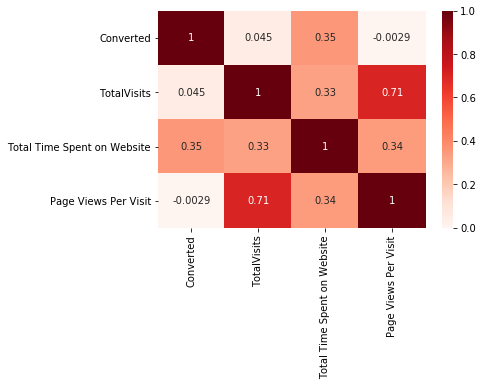

In [115]:
sns.heatmap(leads.corr(), cmap="Reds", annot=True)
plt.show()

#### From the above heatmap, we can validate our statement that the target variable 'Converted' has the highest correlation with 'Total Time Spent on Website'.

## STEP 4: MAPPING CATEGORICAL VARIABLES AND DUMMY ENCODING 

In [116]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [117]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [118]:
# Getting dummies for the categorical variables and storing them in new dataframes
Lead_Origin_d = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin', drop_first = True)
Lead_Source_d = pd.get_dummies(leads['Lead Source'], prefix='Lead Source', drop_first = True)
Last_Activity_d = pd.get_dummies(leads['Last Activity'], prefix='Last Activity', drop_first = True)
Specialization_d = pd.get_dummies(leads['Specialization'], prefix='Specialization', drop_first = True)
What_is_your_current_occupation_d = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation', drop_first = True)
Tags_d = pd.get_dummies(leads['Tags'], prefix='Tags', drop_first = True)
Lead_Profile_d = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile', drop_first = True)
City_d = pd.get_dummies(leads['City'], prefix='City', drop_first = True)
Last_Notable_Activity_d = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity', drop_first = True)

In [119]:
# Drop the categorical columns as we have already created dummies for them
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Profile','City','Last Notable Activity'], axis = 1, inplace = True)

In [120]:
# Add the results to the original dataframe

leads= pd.concat([leads, Lead_Origin_d, Lead_Source_d, Last_Activity_d, Specialization_d, What_is_your_current_occupation_d, Tags_d, Lead_Profile_d, City_d, Last_Notable_Activity_d], axis = 1)

In [121]:
# Let's check the dataframe now
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Mentioned,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [122]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                               9103

### Let's check the distribution of our target variable 'Converted'

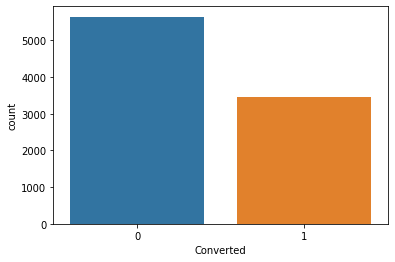

In [123]:
sns.countplot(x = 'Converted', data   = leads)

In [124]:
leads['Converted'].value_counts(dropna = False)

0    5642
1    3461
Name: Converted, dtype: int64

In [125]:
Conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Conversion

38.02043282434362

##### The data is more or less balanced as we have 38% conversion rate!

### We can now proceed to the model building!

## STEP 5: MODEL BUILDING

## Train-Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# Putting feature variable to X
X = leads.drop('Converted', axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Mentioned,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [128]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [129]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Mentioned,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,0,-0.105932,1.476324,-0.420056,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5520,0,1.113025,-0.771066,2.354047,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1962,0,0.503547,-0.571257,0.084327,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1566,0,3.246199,1.393834,0.588709,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9170,0,-1.020149,-0.881052,-1.176630,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


### Running our training model

In [132]:
import statsmodels.api as sm

In [133]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.8
Date:                Mon, 20 Jul 2020   Deviance:                       2673.6
Time:                        13:47:56   Pearson chi2:                 8.29e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   13.1336      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Do Not Email                                            -1.2475      0.279     -4.476      0.000      -1.794      -0.701
TotalVisits                                              0.3763      0.073      5.169      0.000       0.234       0.519
Total Time Spent on Website                              1.1187      0.059     18.943      0.000       1.003       1.234
Page Views Per Visit                                    -0.3777      0.085     -4.422      0.000      -0.545      -0.210
A free copy of Mastering The Interview                   0.2708      0.163      1.660      0.097      -0.049       0.590
Lead Origin_Landing Page Submission                      0.0120      0.228      0.053      0.958      -0.435       0.459
Lead Origin_Lead Add Form                                1.8940      1.178      1.607      0.108      -0.416       4.204
Lead Origin_Lead Import                                  1.2500      1.512      0.827      0.408      -1.713       4.213
Lead Source_Google                                       0.1334      0.169      0.788      0.430      -0.198       0.465
Lead Source_Olark Chat                                   1.1787      0.232      5.088      0.000       0.725       1.633
Lead Source_Organic Search                              -0.0506      0.192     -0.263      0.792      -0.427       0.326
Lead Source_Others                                       0.2167      0.946      0.229      0.819      -1.638       2.071
Lead Source_Reference                                   -0.4186      1.245     -0.336      0.737      -2.860       2.022
Lead Source_Referral Sites                               0.0260      0.527      0.049      0.961      -1.008       1.060
Lead Source_Social Media                                -0.1971      1.477     -0.134      0.894      -3.091       2.697
Lead Source_Welingak Website                             2.7724      1.386      2.000      0.045       0.056       5.489
Last Activity_Email Bounced                             -0.2947      0.580     -0.508      0.611      -1.432       0.842
Last Activity_Email Link Clicked                         0.8958      0.591      1.516      0.130      -0.262       2.054
Last Activity_Email Opened                               1.0880      0.337      3.229      0.001       0.428       1.748
Last Activity_Form Submitted on Website                  0.7770      0.507      1.533      0.125      -0.217       1.771
Last Activity_Olark Chat Conversation                   -0.4922      0.383     -1.286      0.199      -1.242       0.258
Last Activity_Others                                     0

### Feature Selection Using RFE

In [134]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [135]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [136]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [137]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', False, 43),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Others', False, 38),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 13),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last

In [138]:
col = X_train.columns[rfe.support_]

In [139]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_No Specialization',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
     

#### Assessing the model with StatsModels

#### MODEL 1

In [140]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.1
Date:                Mon, 20 Jul 2020   Deviance:                       2892.2
Time:                        13:47:59   Pearson chi2:                 8.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5758      0.325    -14.089      0.000      -5.212      -3.939
Do Not Email                                -1.4378      0.210     -6.846      0.000      -1.850      -1.026
Total Time Spent on Website                  1.0607      0.055     19.329      0.000       0.953       1.168
Lead Origin_Lead Add Form                    2.5609      0.363      7.047      0.000       1.849       3.273
Lead Source_Olark Chat                       1.7408      0.149     11.676      0.000       1.449       2.033
Lead Source_Welingak Website                 3.1436      0.813      3.869      0.000       1.551       4.736
Last Activity_Olark Chat Conversation       -1.3470      0.215     -6.274      0.000      -1.768      -0.926
Specialization_Not Mentioned                -1.2353      0.152     -8.109      0.000      -1.534      -0.937
Tags_Closed by Horizzon                      8.5378      0.791     10.791      0.000       6.987      10.088
Tags_Not Mentioned                           3.0021      0.328      9.162      0.000       2.360       3.644
Tags_Others                                  2.9968      0.333      8.986      0.000       2.343       3.650
Tags_Ringing                                -0.6946      0.400     -1.737      0.082      -1.478       0.089
Tags_Will revert after reading the email     7.0327      0.362     19.403      0.000       6.322       7.743
Tags_switched off                           -0.7253      0.684     -1.061      0.289      -2.065       0.615
Lead Profile_Lateral Student                24.7452   1.22e+04      0.002      0.998   -2.38e+04    2.39e+04
Last Notable Activity_SMS Sent               2.0547      0.119     17.234      0.000       1.821       2.288
============================================================================================================
"""

##### The category 'Lead Profile_Lateral Student' has a very high p-value and should be dropped even before checking the VIF.

In [141]:
col = col.drop('Lead Profile_Lateral Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Not Mentioned', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 2

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.3
Date:                Mon, 20 Jul 2020   Deviance:                       2902.6
Time:                        13:48:00   Pearson chi2:                 8.23e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4744      0.312    -14.343      0.000      -5.086      -3.863
Do Not Email                                -1.4385      0.210     -6.854      0.000      -1.850      -1.027
Total Time Spent on Website                  1.0570      0.055     19.311      0.000       0.950       1.164
Lead Origin_Lead Add Form                    2.5533      0.363      7.034      0.000       1.842       3.265
Lead Source_Olark Chat                       1.7310      0.149     11.635      0.000       1.439       2.023
Lead Source_Welingak Website                 3.1453      0.812      3.872      0.000       1.553       4.737
Last Activity_Olark Chat Conversation       -1.3499      0.215     -6.292      0.000      -1.770      -0.929
Specialization_Not Mentioned                -1.2327      0.152     -8.098      0.000      -1.531      -0.934
Tags_Closed by Horizzon                      8.4494      0.786     10.754      0.000       6.909       9.989
Tags_Not Mentioned                           2.9042      0.315      9.215      0.000       2.286       3.522
Tags_Others                                  2.8987      0.321      9.025      0.000       2.269       3.528
Tags_Ringing                                -0.7897      0.390     -2.026      0.043      -1.554      -0.026
Tags_Will revert after reading the email     6.9400      0.351     19.772      0.000       6.252       7.628
Tags_switched off                           -0.8220      0.678     -1.213      0.225      -2.151       0.507
Last Notable Activity_SMS Sent               2.0521      0.119     17.228      0.000       1.819       2.286
============================================================================================================
"""

##### 'Tags_switched off' has a very high p-value and must be dropped now

In [143]:
col = col.drop('Tags_switched off', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Not Mentioned', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 3

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.1
Date:                Mon, 20 Jul 2020   Deviance:                       2904.3
Time:                        13:48:00   Pearson chi2:                 8.11e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.6927      0.281    -16.719      0.000      -5.243      -4.143
Do Not Email                                -1.4391      0.210     -6.865      0.000      -1.850      -1.028
Total Time Spent on Website                  1.0587      0.055     19.346      0.000       0.951       1.166
Lead Origin_Lead Add Form                    2.5619      0.364      7.046      0.000       1.849       3.275
Lead Source_Olark Chat                       1.7401      0.149     11.698      0.000       1.449       2.032
Lead Source_Welingak Website                 3.1395      0.813      3.864      0.000       1.547       4.732
Last Activity_Olark Chat Conversation       -1.3492      0.215     -6.280      0.000      -1.770      -0.928
Specialization_Not Mentioned                -1.2356      0.152     -8.122      0.000      -1.534      -0.937
Tags_Closed by Horizzon                      8.6663      0.774     11.194      0.000       7.149      10.184
Tags_Not Mentioned                           3.1249      0.283     11.053      0.000       2.571       3.679
Tags_Others                                  3.1187      0.290     10.761      0.000       2.551       3.687
Tags_Ringing                                -0.5607      0.360     -1.557      0.119      -1.267       0.145
Tags_Will revert after reading the email     7.1593      0.323     22.166      0.000       6.526       7.792
Last Notable Activity_SMS Sent               2.0343      0.118     17.261      0.000       1.803       2.265
============================================================================================================
"""

##### 'Tags_Ringing' has a high p-value and should be dropped now.

In [145]:
col = col.drop('Tags_Ringing', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Not Mentioned', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1453.3
Date:                Mon, 20 Jul 2020   Deviance:                       2906.6
Time:                        13:48:00   Pearson chi2:                 7.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0338      0.200    -25.149      0.000      -5.426      -4.642
Do Not Email                                -1.4328      0.209     -6.847      0.000      -1.843      -1.023
Total Time Spent on Website                  1.0576      0.055     19.330      0.000       0.950       1.165
Lead Origin_Lead Add Form                    2.5270      0.358      7.057      0.000       1.825       3.229
Lead Source_Olark Chat                       1.7416      0.149     11.710      0.000       1.450       2.033
Lead Source_Welingak Website                 3.1703      0.810      3.914      0.000       1.583       4.758
Last Activity_Olark Chat Conversation       -1.3463      0.215     -6.257      0.000      -1.768      -0.925
Specialization_Not Mentioned                -1.2371      0.152     -8.144      0.000      -1.535      -0.939
Tags_Closed by Horizzon                      9.0112      0.748     12.050      0.000       7.546      10.477
Tags_Not Mentioned                           3.4723      0.198     17.561      0.000       3.085       3.860
Tags_Others                                  3.4653      0.208     16.635      0.000       3.057       3.874
Tags_Will revert after reading the email     7.5042      0.254     29.586      0.000       7.007       8.001
Last Notable Activity_SMS Sent               2.0089      0.116     17.254      0.000       1.781       2.237
============================================================================================================
"""

### Now that we have good p-values, we will check the VIF's!

### CHECKING VIF's

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Not Mentioned,2.01
8,Tags_Not Mentioned,1.96
3,Lead Source_Olark Chat,1.91
2,Lead Origin_Lead Add Form,1.82
10,Tags_Will revert after reading the email,1.58
1,Total Time Spent on Website,1.43
5,Last Activity_Olark Chat Conversation,1.43
11,Last Notable Activity_SMS Sent,1.43
4,Lead Source_Welingak Website,1.38
7,Tags_Closed by Horizzon,1.18


##### The VIF values are within acceptable range. We have built a good model. Now, we must go ahead and check the performance metrics!

#### The overall equation for our regression model:
#### Converted = -5.03 - 1.43 Do Not Email + 1.06 Total Time Spent on Website + 2.53 Lead Origin_Lead Add Form + 1.74 Lead Source_Olark Chat + 3.17 Lead Source_Welingak Website - 1.35 Last Activity_Olark Chat Conversation -1.24 Specialization_Not Mentioned + 9.02 Tags_Closed by Horizzon + 3.47 Tags_Not Mentioned + 3.47 Tags_Others + 7.5 Tags_Will revert after reading the email + 2.01 Last Notable Activity_SMS Sent

In [149]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.880981
5520    0.084402
1962    0.003547
1566    0.981007
9170    0.014429
5097    0.120380
8954    0.038925
309     0.885792
5519    0.505019
1050    0.974663
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88098074, 0.08440197, 0.00354747, 0.98100679, 0.01442885,
       0.12038021, 0.03892471, 0.88579237, 0.50501876, 0.97466279])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

##### Prospect_ID is the unique identifier column. So we will append it with the conversion values

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.880981,7962
1,0,0.084402,5520
2,0,0.003547,1962
3,1,0.981007,1566
4,0,0.014429,9170


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [152]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.880981,7962,1
1,0,0.084402,5520,0
2,0,0.003547,1962,0
3,1,0.981007,1566,1
4,0,0.014429,9170,0


#### Check the various performance measures using the CONFUSION MATRIX!

In [153]:
from sklearn import metrics

In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3745  208]
 [ 389 2030]]


In [155]:
# Predicted     not_converted    converted
# Actual
# not_converted        3744      209
# converted            385       2034  

In [156]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9063088512241054


#### The accuracy is 90.6 %

### Metrics Beyond Simple Accuracy

In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8391897478296817

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.9473817353908424

In [160]:
# Calculate false postive rate - predicting conversion when customer does not actually convert
print(FP/ float(TN+FP))

0.052618264609157604


In [161]:
# positive predictive value 
print (TP / float(TP+FP))

0.9070598748882931


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9059022738268021


##### Next,we will plot the ROC curve to find the optimal cutoff point

## STEP 6: PLOTTING THE ROC CURVE

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

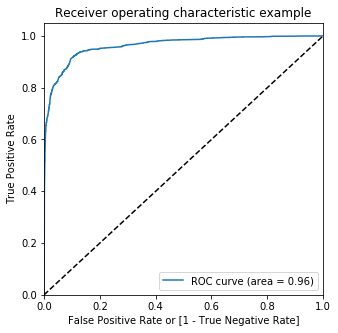

In [165]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The AUROC is 0.96 suggesting a very good predictive model!

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [166]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.880981,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.084402,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003547,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.981007,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014429,9170,0,1,0,0,0,0,0,0,0,0,0


In [167]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.780132  0.969822  0.664053
0.2   0.2  0.895166  0.938818  0.868454
0.3   0.3  0.904112  0.920215  0.894258
0.4   0.4  0.903798  0.871434  0.923602
0.5   0.5  0.906309  0.839190  0.947382
0.6   0.6  0.905367  0.803638  0.967620
0.7   0.7  0.899561  0.775940  0.975209
0.8   0.8  0.887006  0.734188  0.980521
0.9   0.9  0.866447  0.660190  0.992664


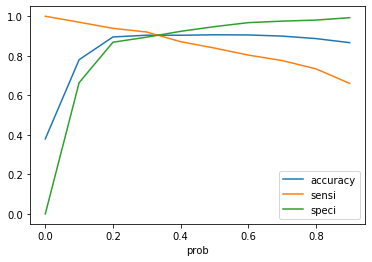

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Sensitivity seems to be more important than specificity as reducing the number of False Negatives is more important than reducing the number of False Positives as a unit increase in the False Positives would mean an addtional effort on the part of the Sales team but an increase in the number of False Negatives would mean a loss in revenue. So we select 0.3 as the cutoff point as that gives the best balance between an increased sensitivity and a considerably good specificity. 

### 0.3 seems to be ideal cutoff point for balanced accuracy, sensitivity and specificity

In [169]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.880981,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.084402,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003547,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.981007,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014429,9170,0,1,0,0,0,0,0,0,0,0,0,0


### The Conversion probability is the ideal column for generating the Lead Score. We can approximate this Conversion Probabilty to a lead score that will tell us the people likely to get converted. A higher Lead Score would imply higher chance of getting converted and we can set a cutoff for targeting this highly rated people.

#### Generating Lead Score Column, the ultimate goal of our model

In [170]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.880981,7962,1,1,1,1,1,1,1,1,1,1,0,1,88
1,0,0.084402,5520,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.003547,1962,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.981007,1566,1,1,1,1,1,1,1,1,1,1,1,1,98
4,0,0.014429,9170,0,1,0,0,0,0,0,0,0,0,0,0,1


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9041117388575016

#### The accuracy is 90.4%

In [172]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3535,  418],
       [ 193, 2226]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.920214964861513

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.8942575259296737

In [176]:
# Calculate false postive rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.10574247407032633


In [177]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8419062027231468


In [178]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9482296137339056


#### The accuracy of the model is 90.4%. The sensitivity is 92%. The specificity is 89.4%. The FPR is as low as 10.5%. All these suggest that we have a very good model at hand.

### Precision and Recall

In [179]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3535,  418],
       [ 193, 2226]], dtype=int64)

#### Precision- TP/(TP+FP)

In [180]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8419062027231468

#### Recall - TP/(TP+FN)

In [181]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.920214964861513

#### The precison is 84.2% and the recall is 92%(same as sensitivity) suggesting a very good regression model.

### Precision and Recall tradeoff

In [182]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [184]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

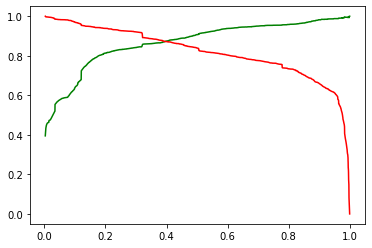

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## STEP 7: MAKING PREDICTIONS ON THE TEST SET

In [186]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [187]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Not Mentioned,Tags_Closed by Horizzon,Tags_Not Mentioned,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3504,0,-0.108519,0,0,0,0,0,0,0,0,0,0
4050,0,-0.888077,1,0,0,0,0,0,0,0,1,1
7201,1,0.420993,0,0,0,0,0,0,0,1,0,1
1196,0,-0.110357,0,0,0,0,0,0,0,0,0,0
8219,0,-0.433947,0,0,0,0,0,0,0,1,0,0


In [188]:
X_test_sm = sm.add_constant(X_test)

In [189]:
y_test_pred = res.predict(X_test_sm)

In [190]:
y_test_pred[:10]

3504    0.005774
4050    0.997687
7201    0.366515
1196    0.005763
8219    0.116351
8747    0.119596
9048    0.141973
6524    0.102175
7693    0.161674
8187    0.191995
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [192]:
# Let's see the head
y_pred_1.head()

,0
3504,0.005774
4050,0.997687
7201,0.366515
1196,0.005763
8219,0.116351


In [193]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [194]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [195]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [197]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.005774
1,1,4050,0.997687
2,0,7201,0.366515
3,0,1196,0.005763
4,1,8219,0.116351


In [198]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [199]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,0,3504,0.005774
1,1,4050,0.997687
2,0,7201,0.366515
3,0,1196,0.005763
4,1,8219,0.116351


In [200]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [201]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob','Final_Predicted']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [202]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,3504,0,0.005774,0,1
1,4050,1,0.997687,1,100
2,7201,0,0.366515,1,37
3,1196,0,0.005763,0,1
4,8219,1,0.116351,0,12


In [203]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.9121201025265471

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1531,  158],
       [  82,  960]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9213051823416507

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.9064535227945529

In [208]:
from sklearn.metrics import precision_score, recall_score

In [209]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

0.8586762075134168

In [210]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.9213051823416507

#### On our test data,the accuracy is 91.2%. The sensitivity is 92.13%. The specificity is 90.64%. The precision is 85.86%. 

### KEY PERFORMANCE METRICS ON TRAIN DATA AND TEST DATA:

##### Metrics                                                 Train Data                                                    Test Data

#### Accuracy-                                             90.4%                                                       91.21%
#### Sensitivity-                                              92%                                                       92.13%
#### Specificity-                                           89.4%                                                       90.64%
####  Precision-                                            84.2%                                                       85.87%

#### The overall predictive power of our model is very good and the model performs exceedingly well to the test data, with similar performance metrics scores as the train data. Hence, we can say that our model is fine and we can use this model to follow up a LEAD and convert it successfully using the Prospect ID numbers.